# Setup
This Jupyter Notebook is meant to be executed directly from Google Colab in a plug and play manner.
To enable this, the following code below can be run to set up the notebook

In [1]:
import os
import sys

!git clone https://github.com/terryluan12/Genrify.git
!cd Genrify && make

sys.path.insert(0, "Genrify/src")

Cloning into 'Genrify'...
remote: Enumerating objects: 866, done.
remote: Counting objects: 100% (255/255), done.
remote: Compressing objects: 100% (167/167), done.
remote: Total 866 (delta 157), reused 144 (delta 85), pack-reused 611
Receiving objects: 100% (866/866), 5.75 MiB | 10.98 MiB/s, done.
Resolving deltas: 100% (546/546), done.
pip install -r requirements.txt
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=f0832febebd560d48a0a283a6ffa2c08b95088d1a096be67143c5847b4f4f853
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


Run code below if using Google Drive for retrieving test data and CNN models for the Ensemble model

In [2]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Preprocessing Code
The following code can be run to download the datasets and preprocess the datasets

In [3]:
from datasources import download_datasets, convert_files_to_wav
from preprocessing import preprocess
from cnn.testhandler.TestHandler import TestHandler

In [8]:
# Make sure to change subset_num to the subset which you are using
subset_num = 0
#Possible method values:
#"spec", "mel", "chroma", "mfcc" to retrieve exclusive training datasets
#"create_testing_data" to create testing data for the first time (not needed anymore due to option below)
#"test" to unzip already preprocessed testing data from Google Drive
method = "create_testing_data"

if method!="test":
    if method=="create_testing_data":
        !unzip /content/drive/MyDrive/"APS360 Team Project"/Test_Data/test_data_mp3.zip
        data_dir = "/content/test_data_mp3"
        output_dir = "/content/Genrify/src/datasources/test_data_wav"
        convert_files_to_wav(data_dir, output_dir)
    elif not os.path.isdir("Genrify/src/datasources/processed_data"):
        download_datasets("Genrify/src")

    preprocess(subset_num, method, "Genrify/src")
    if method=="create_testing_data":
      !zip -r '/content/drive/MyDrive/APS360 Team Project/Test_Data/test_mel.zip' '/content/Genrify/src/datasources/mel'
      !zip -r '/content/drive/MyDrive/APS360 Team Project/Test_Data/test_spectrogram.zip' '/content/Genrify/src/datasources/spectrogram'
      !zip -r '/content/drive/MyDrive/APS360 Team Project/Test_Data/test_chroma.zip' '/content/Genrify/src/datasources/chroma'
      !zip -r '/content/drive/MyDrive/APS360 Team Project/Test_Data/test_mfcc.zip' '/content/Genrify/src/datasources/mfcc'
else:
    #Unzipping already preprocessed testing data
    !unzip -q '/content/drive/MyDrive/APS360 Team Project/Test_Data/test_mel.zip' -d '/'
    !unzip -q '/content/drive/MyDrive/APS360 Team Project/Test_Data/test_spectrogram.zip' -d '/'
    !unzip -q '/content/drive/MyDrive/APS360 Team Project/Test_Data/test_chroma.zip' -d '/'
    !unzip -q '/content/drive/MyDrive/APS360 Team Project/Test_Data/test_mfcc.zip' -d '/'
    test_handler = TestHandler(batch_size=1, num_workers=2)

Streaming output truncated to the last 5000 lines.
updating: content/Genrify/src/datasources/mel/5/758.png (deflated 5%)
updating: content/Genrify/src/datasources/mel/5/803.png (deflated 6%)
updating: content/Genrify/src/datasources/mel/5/809.png (deflated 5%)
updating: content/Genrify/src/datasources/mel/5/894.png (deflated 8%)
updating: content/Genrify/src/datasources/mel/5/795.png (deflated 5%)
updating: content/Genrify/src/datasources/mel/5/862.png (deflated 8%)
updating: content/Genrify/src/datasources/mel/5/757.png (deflated 5%)
updating: content/Genrify/src/datasources/mel/5/865.png (deflated 6%)
updating: content/Genrify/src/datasources/mel/5/769.png (deflated 5%)
updating: content/Genrify/src/datasources/mel/5/886.png (deflated 9%)
updating: content/Genrify/src/datasources/mel/5/832.png (deflated 7%)
updating: content/Genrify/src/datasources/mel/5/755.png (deflated 5%)
updating: content/Genrify/src/datasources/mel/5/801.png (deflated 4%)
updating: content/Genrify/src/datasourc

In [5]:
from cnn import mfcc_model, training
from utils import plot
from cnn.datahandler.DataHandler import DataHandler

# Ensemble Model
This code block implements ensemle learning for all of our best models

Note that the batch size in used in TestHandler should be divide the total number of samples evenly. This is why batch_size=1 is used

In [6]:
from ensemble import ensemble

weak_learners=ensemble.get_weak_learners()
print("Test Accuracy:", ensemble.full_model([test_handler.spec_test_loader,test_handler.mfcc_test_loader,test_handler.chroma_test_loader,test_handler.mel_test_loader], weak_learners=[weak_learners[x] for x in [0,1,2,3]], cuda=True))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 134MB/s]
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed i

Test Accuracy: 0.384


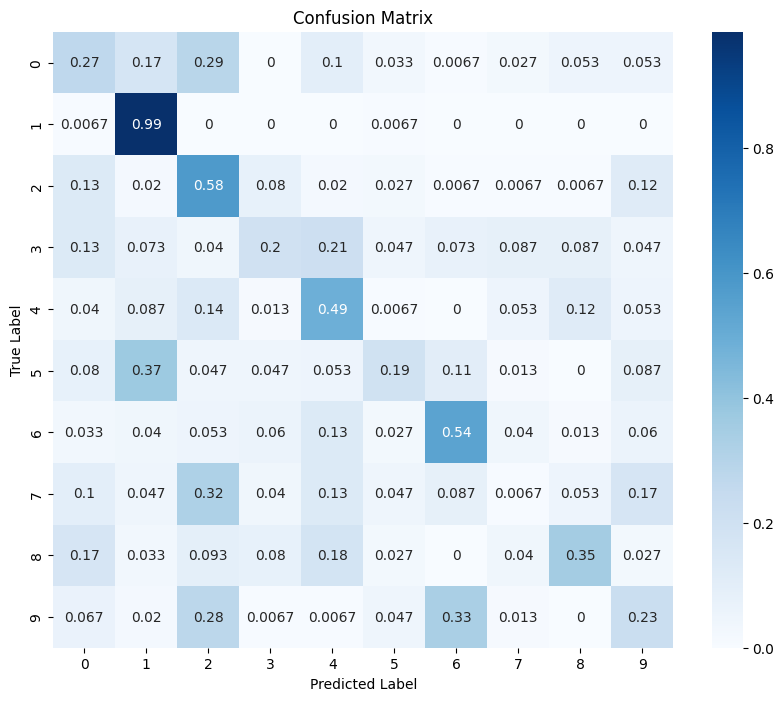

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
classes = range(10)
confusion_matrix = np.loadtxt("/content/Genrify/src/datasources/full_model_confusion_matirx.csv")
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, cmap=plt.cm.Blues, xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [23]:
from IPython.display import Audio, display

sound_file = "/content/Genrify/src/datasources/processed_test_data/0/0.wav_trimmed0.wav"
display(Audio(sound_file, autoplay=True))

In [30]:
import utils
import librosa
from torchvision.datasets import DatasetFolder

data_dir = "/content/Genrify/src/datasources/processed_test_data"
full_dataset=DatasetFolder(data_dir, librosa.load, extensions=[".wav"])
print(dir(full_dataset))
print(full_dataset.classes)
print(full_dataset[0])

['__add__', '__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_format_transform_repr', '_is_protocol', '_repr_indent', 'class_to_idx', 'classes', 'extensions', 'extra_repr', 'find_classes', 'loader', 'make_dataset', 'root', 'samples', 'target_transform', 'targets', 'transform', 'transforms']
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
((array([-0.02843916, -0.02646531,  0.01190883, ..., -0.21578112,
       -0.19497617, -0.1976467 ], dtype=float32), 22050), 0)


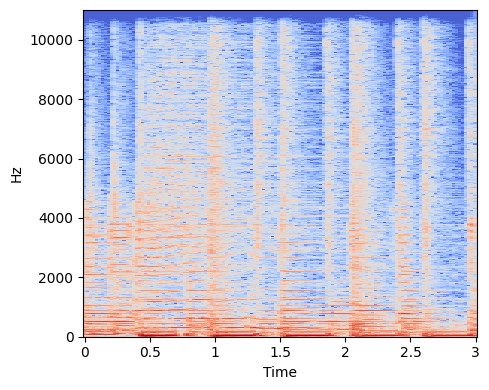

In [31]:
sound, label = full_dataset[0]
spectrogram = utils.spectrogram.extract_features_spectrogram(sound)
plt.figure(figsize=(5, 4), frameon=False)
plt.ylim(0, 11000) # Always plot up to 11kHz
librosa.display.specshow(spectrogram, x_axis='time', y_axis='hz', vmin=-40, vmax=40) # Always show magnitude from -40 to +40 dB
plt.tight_layout()
plt.show()

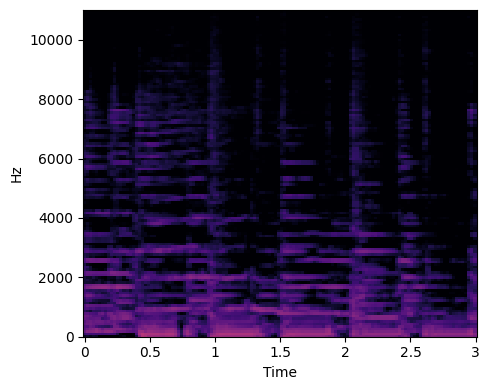

In [33]:
mel = utils.mel_spectrogram.extract_features_mel_spectrogram(sound)
plt.figure(figsize=(5, 4), frameon=False)
plt.ylim(0, 11000) # Always plot up to 11kHz
librosa.display.specshow(mel, x_axis='time', y_axis='hz', vmin=-40, vmax=40) # Always show magnitude from -40 to +40 dB
plt.tight_layout()
plt.show()

In [38]:
sound_array, sr = sound
display(Audio(sound_array, rate=sr, autoplay=False))

## Example to training an model

In [ ]:
# # training example
# mfcc_data_dir = os.path.join("Genrify", "src", "datasources", "mfcc")
# mfcc_data_handler = DataHandler(mfcc_data_dir, batch_size=32, num_workers=4)
# lr = 1e-4
# num_epochs = 30
# mfcc_cnn = mfcc_model.MFCC_CNN()
# print(f"Learning rate: {1e-4}")
# training.train(mfcc_cnn, mfcc_data_handler.train_loader, mfcc_data_handler.val_loader, num_epochs, lr, 32)
# model_path = training.get_model_name(mfcc_cnn.name, 32, lr, num_epochs-1)

# # plot in the notebook
# %matplotlib inline
# plot.plot_training_curve(model_path)
# plot.plot_confusion_matrix(model_path, range(10))

## Training Chroma

In [ ]:
# training example for chroma
#from cnn import chroma_model, training_chroma

#chroma_data_dir = '/content/Genrify/src/datasources/chroma'
#chroma_data_handler = DataHandler(chroma_data_dir, batch_size=32, num_workers=2)
#lr = 1e-4
#num_epochs = 60
#chroma_cnn = chroma_model.ChromaClassifier()
#print(f"Learning rate: {lr}")

#training_chroma.train(chroma_cnn, chroma_data_handler.train_loader, chroma_data_handler.val_loader, num_epochs, lr, 32, 10, 0.1)
#model_path = training.get_model_name(chroma_cnn.name, 32, lr, num_epochs-1)
# %matplotlib inline
# plot.plot_training_curve(model_path)
# plot.plot_confusion_matrix(model_path, range(10))